In [20]:
import json
import matplotlib.pyplot as plt

In [26]:
def plot_dict(stats):
    # Sort dictionary by value
    stats_sorted = dict(sorted(stats.items(), key=lambda item: item[1], reverse=True))
    
    chars = list(stats_sorted.keys())
    values = list(stats_sorted.values())

    plt.bar(range(len(stats_sorted)), values, tick_label=chars)
    plt.show()

In [138]:
def check_chars(word):
    # Remove words containing these characters from the dictionary
    chars = ['ž','c','z','y','w','q','x','é','è','ê','α']
    for char in word.lower():
        if char in chars:
            return False
    if word.isalpha():
        return True

In [133]:
def get_dictionary(filename):
    if '.txt' in filename:
        with open(filename, 'r', encoding='utf-8') as f:
            words_list = f.read().splitlines()
        words = {word.lower():1 for word in words_list if check_chars(word)}
    elif '.json' in filename:
        with open(filename) as json_file:
            words_raw = json.load(json_file)
        words = {word:1 for word in words_raw if word.isalpha()}
            
    # If word has a length of 3, add a value to prefix tree to indicate it
    # Create a prefix tree
    prefix_tree = dict()
    for k in list(words.keys()):
        # Prefix is also a word
        if len(k) == 3:
            prefix_tree[k] = 1
        # Prefix itself isn't a word
        elif len(k) > 3:
            prefix_tree[k[0:3]] = 0
        # Remove words smaller than length of 3
        elif len(k) < 3:
            del words[k]
    return words, prefix_tree

In [2]:
def count_chars(dictionary):
    # Count the total nr of each characters in dictionary
    char_counts = dict()
    # Count the nr of words that has each character
    char_occurrences = dict()
    for word in dictionary.keys():
        chars = set(list(word))
        for char in chars:
            if char_counts.get(char) == None:
                char_counts[char] = word.count(char)
                char_occurrences[char] = 1
            else:
                char_counts[char] += word.count(char)
                char_occurrences[char] += 1
    return char_counts, char_occurrences

In [43]:
# Average number of given character in words
def get_avg_char_count(char_counts, dictionary):
    avg_char_count = dict()
    for char, count in char_counts.items():
        avg_char_count[char] = count/len(dictionary.keys())
        #print(char, ":", round(count/len(dictionary.keys()), 2))
    return avg_char_count

In [44]:
# Nr of words that have given character
def get_char_proportion(char_occurrences, dictionary):
    char_proportion = dict()
    for char, count in char_occurrences.items():
        char_proportion[char] = count/len(dictionary.keys())
        #print(char, ":", round(count/len(dictionary.keys()), 2))
    return char_proportion

In [87]:
#dictionary = {"test":"", "boggle":"", "his":"", "josh":"", "toe":"", "joe":"", "she":"", "pet":""}
en_dict, prefix_tree = get_dictionary('words_dictionary.json')
char_counts_en, char_occurrences_en = count_chars(en_dict)
print(char_counts_en)
print(char_occurrences_en)

{'a': 295742, 'h': 92335, 'd': 113146, 'e': 376411, 'i': 312967, 'g': 82590, 'n': 251396, 's': 250232, 'l': 194873, 'm': 105158, 'r': 246103, 'v': 33045, 'k': 26788, 'o': 251553, 'w': 22379, 'f': 39203, 'c': 152939, 't': 230851, 'u': 131464, 'b': 63902, 'y': 70553, 'x': 10474, 'j': 5445, 'p': 113622, 'z': 14747, 'q': 5863}
{'a': 219643, 'h': 82786, 'd': 100158, 'e': 252854, 'i': 225885, 'g': 74973, 'n': 188575, 's': 184673, 'l': 157569, 'm': 93568, 'r': 198737, 'v': 31709, 'k': 25336, 'o': 185225, 'w': 21385, 'f': 35176, 'c': 128651, 't': 182845, 'u': 114355, 'b': 59086, 'y': 66518, 'x': 10417, 'j': 5375, 'p': 98703, 'z': 13967, 'q': 5749}


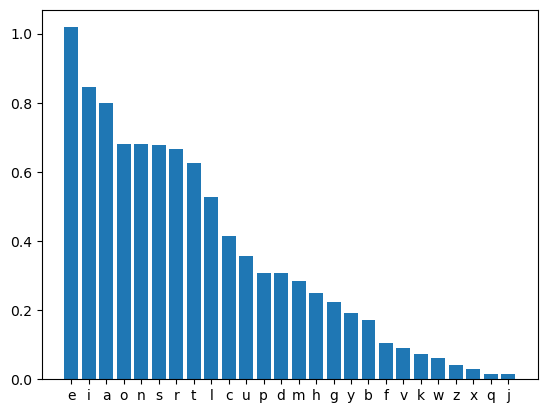

In [88]:
avg_char_count_en = get_avg_char_count(char_counts_en, en_dict)
plot_dict(avg_char_count_en)

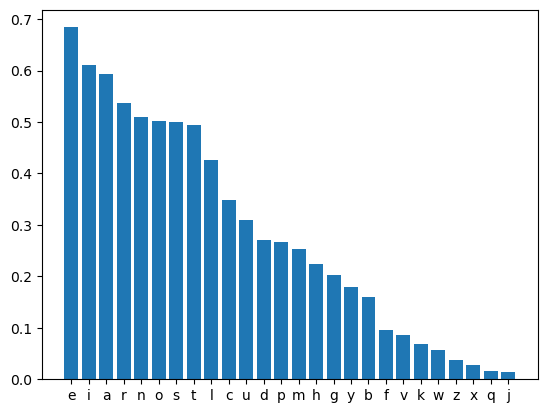

In [89]:
char_proportion_en = get_char_proportion(char_occurrences_en, en_dict)
plot_dict(char_proportion_en)

In [90]:
# en: https://boardgames.stackexchange.com/questions/29264/boggle-what-is-the-dice-configuration-for-boggle-in-various-languages
dice = [["R", "I", "F", "O", "B", "X"],
       ["I", "F", "E", "H", "E", "Y"],
       ["D", "E", "N", "O", "W", "S"],
       ["U", "T", "O", "K", "N", "D"],
       ["H", "M", "S", "R", "A", "O"],
       ["L", "U", "P", "E", "T", "S"],
       ["A", "C", "I", "T", "O", "A"],
       ["Y", "L", "G", "K", "U", "E"],
       ["Qu", "B", "M", "J", "O", "A"],
       ["E", "H", "I", "S", "P", "N"],
       ["V", "E", "T", "I", "G", "N"],
       ["B", "A", "L", "I", "Y", "T"],
       ["E", "Z", "A", "V", "N", "D"],
       ["R", "A", "L", "E", "S", "C"],
       ["U", "W", "I", "L", "R", "G"],
       ["P", "A", "C", "E", "M", "D"],]

dice_strings = {"".join(d).lower():1 for d in dice}
char_counts_dice, char_occurrences_dice = count_chars(dice_strings)

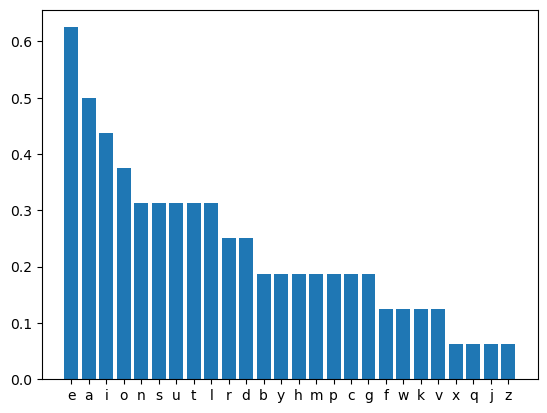

In [91]:
avg_char_count_dice = get_avg_char_count(char_counts_dice, dice_strings)
plot_dict(avg_char_count_dice)

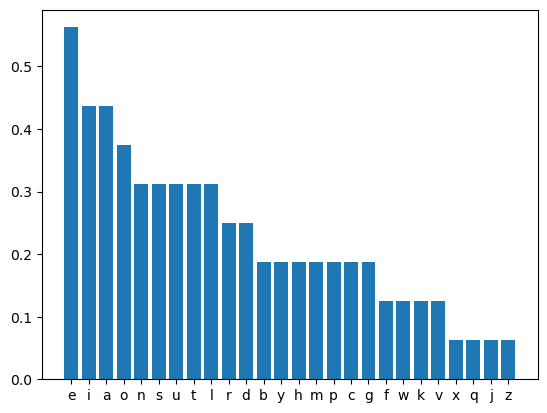

In [92]:
char_proportion_dice = get_char_proportion(char_occurrences_dice, dice_strings)
plot_dict(char_proportion_dice)

In [139]:
et_dict, prefix_tree = get_dictionary('lemmad2013.txt')
char_counts_et, char_occurrences_et = count_chars(et_dict)

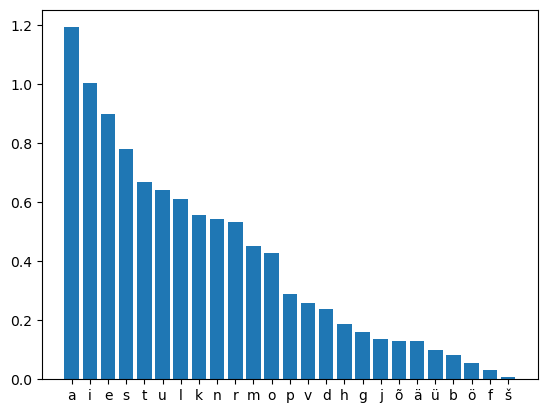

In [140]:
avg_char_count_et = get_avg_char_count(char_counts_et, et_dict)
plot_dict(avg_char_count_et)

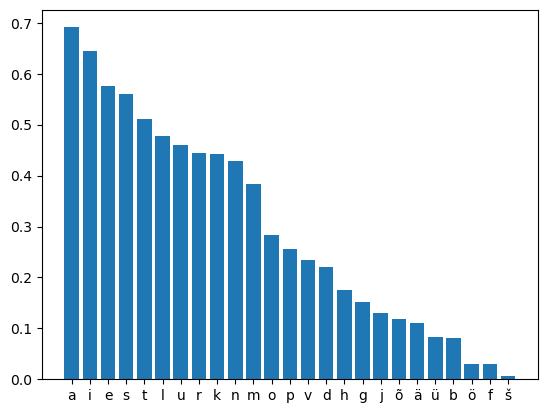

In [141]:
char_proportion_et = get_char_proportion(char_occurrences_et, et_dict)
plot_dict(char_proportion_et)

In [142]:
# Map Etonian alphabet to English Boggle dice based on average occurrences of characters
avg_char_count_dice = dict(sorted(avg_char_count_dice.items(), key=lambda item: item[1], reverse=True))
avg_char_count_et = dict(sorted(avg_char_count_et.items(), key=lambda item: item[1], reverse=True))
avg_char_count_en = dict(sorted(avg_char_count_en.items(), key=lambda item: item[1], reverse=True))

In [143]:
print(char_counts_sorted)

{'e': 10, 'a': 8, 'i': 7, 'o': 6, 'n': 5, 's': 5, 'u': 5, 't': 5, 'l': 5, 'r': 4, 'd': 4, 'b': 3, 'y': 3, 'h': 3, 'm': 3, 'p': 3, 'c': 3, 'g': 3, 'f': 2, 'w': 2, 'k': 2, 'v': 2, 'x': 1, 'q': 1, 'j': 1, 'z': 1}


In [144]:
et_dice = [i[:] for i in dice]
for en_char, et_char in zip(list(avg_char_count_en.keys()), list(avg_char_count_et.keys())[:len(avg_char_count_en)-1]):
    for i in range(len(et_dice)):
        for j in range(len(et_dice[i])):
            if dice[i][j].lower() == en_char or dice[i][j] == "Qu":
                et_dice[i][j] = et_char
    #et_dice = [[et_char if et_dice[i][j].lower()==en_char else et_dice[i][j] for j in range(len(et_dice[i]))] for i in range(len(et_dice))]
    #et_dice = [[et_char if char.lower()==en_char else char for char in d] for d in et_dice]

In [145]:
dice

[['R', 'I', 'F', 'O', 'B', 'X'],
 ['I', 'F', 'E', 'H', 'E', 'Y'],
 ['D', 'E', 'N', 'O', 'W', 'S'],
 ['U', 'T', 'O', 'K', 'N', 'D'],
 ['H', 'M', 'S', 'R', 'A', 'O'],
 ['L', 'U', 'P', 'E', 'T', 'S'],
 ['A', 'C', 'I', 'T', 'O', 'A'],
 ['Y', 'L', 'G', 'K', 'U', 'E'],
 ['Qu', 'B', 'M', 'J', 'O', 'A'],
 ['E', 'H', 'I', 'S', 'P', 'N'],
 ['V', 'E', 'T', 'I', 'G', 'N'],
 ['B', 'A', 'L', 'I', 'Y', 'T'],
 ['E', 'Z', 'A', 'V', 'N', 'D'],
 ['R', 'A', 'L', 'E', 'S', 'C'],
 ['U', 'W', 'I', 'L', 'R', 'G'],
 ['P', 'A', 'C', 'E', 'M', 'D']]

In [146]:
et_dice

[['l', 'i', 'õ', 's', 'j', 'f'],
 ['i', 'õ', 'a', 'd', 'a', 'g'],
 ['p', 'a', 't', 's', 'b', 'u'],
 ['m', 'k', 's', 'ü', 't', 'p'],
 ['d', 'v', 'u', 'l', 'e', 's'],
 ['n', 'm', 'o', 'a', 'k', 'u'],
 ['e', 'r', 'i', 'k', 's', 'e'],
 ['g', 'n', 'h', 'ü', 'm', 'a'],
 ['š', 'j', 'v', 'J', 's', 'e'],
 ['a', 'd', 'i', 'u', 'o', 't'],
 ['ä', 'a', 'k', 'i', 'h', 't'],
 ['j', 'e', 'n', 'i', 'g', 'k'],
 ['a', 'ö', 'e', 'ä', 't', 'p'],
 ['l', 'e', 'n', 'a', 'u', 'r'],
 ['m', 'b', 'i', 'n', 'l', 'h'],
 ['o', 'e', 'r', 'a', 'v', 'p']]

In [147]:
dice_strings_et = {"".join(d).lower():1 for d in et_dice}
char_counts_et_dice, char_occurrences_et_dice = count_chars(dice_strings_et)

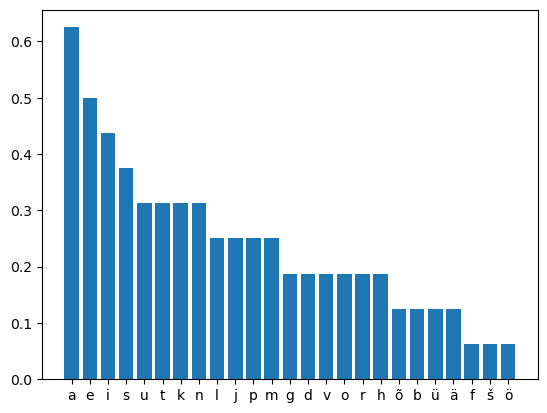

In [148]:
char_proportion_et_dice = get_char_proportion(char_counts_et_dice, dice_strings_et)
plot_dict(char_proportion_et_dice)

In [149]:
avg_char_count_et

{'a': 1.1937942826426338,
 'i': 1.006387565691281,
 'e': 0.9007153844834193,
 's': 0.7819421173322049,
 't': 0.6705800275631751,
 'u': 0.642788112379983,
 'l': 0.6120969171560751,
 'k': 0.5573765804507322,
 'n': 0.5439895694540547,
 'r': 0.5342509621378044,
 'm': 0.452384900869784,
 'o': 0.42733214769744554,
 'p': 0.29080293473474733,
 'v': 0.2586592402399483,
 'd': 0.23881032303812524,
 'h': 0.18797284855693625,
 'g': 0.15945468373829852,
 'j': 0.13730121060667577,
 'õ': 0.13128534748471732,
 'ä': 0.1312796289836508,
 'ü': 0.09913021598778528,
 'b': 0.08226635634267546,
 'ö': 0.055509489852519855,
 'f': 0.0318406139382745,
 'š': 0.00649049871047801}